<a href="https://colab.research.google.com/github/AdrienVansuyt/Python-Quant-Exercices/blob/main/Bollinger_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyse des Bandes de Bollinger pour les Actions de Tesla**
## **Introduction:**

Introduction:

Dans cet exercice, nous allons comparer les Bandes de Bollinger traditionnelles (avec un écart type de 2) et les "BB magiques" (avec un écart type de 2.5) pour les actions de Tesla (TSLA). Les Bandes de Bollinger sont un indicateur technique qui montre la volatilité d'un actif et les niveaux de prix relatifs sur une période donnée. En comparant les deux, nous pouvons voir comment les niveaux de prix extrêmes varient avec des écarts types différents.

[*********************100%%**********************]  1 of 1 completed


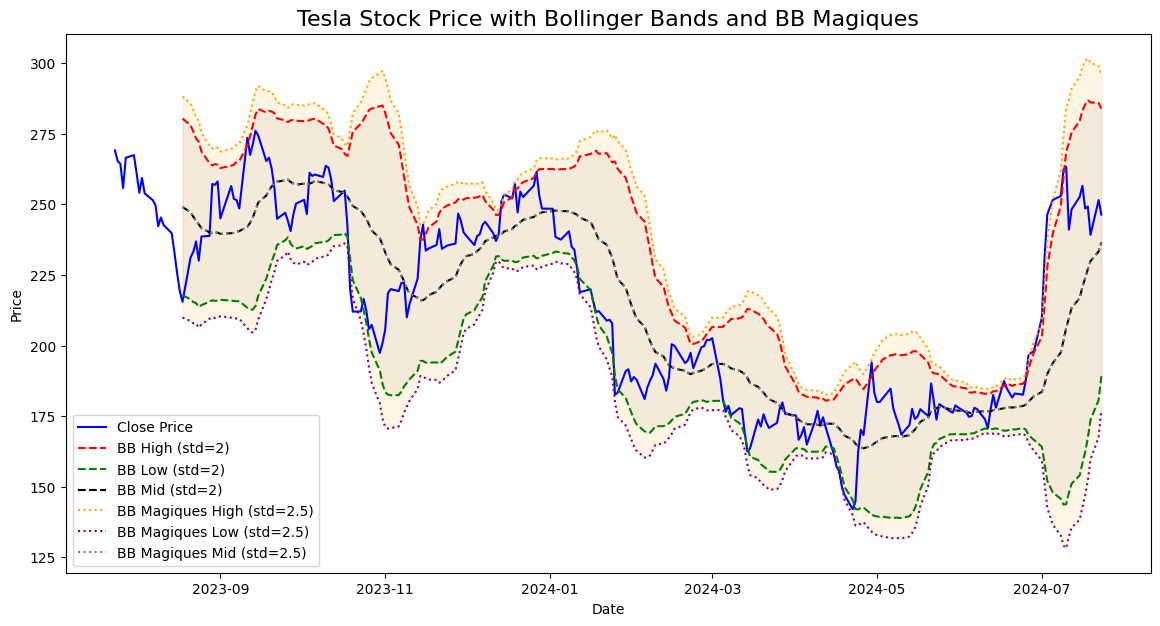

In [5]:
# Importer les bibliothèques nécessaires
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from ta.volatility import BollingerBands

# Télécharger les données de Tesla
data = yf.download('TSLA', period='1y', interval='1d')

# Calculer les Bandes de Bollinger traditionnelles (écart type de 2)
indicator_bb = BollingerBands(close=data['Close'], window=20, window_dev=2)
data['BB_High'] = indicator_bb.bollinger_hband()
data['BB_Low'] = indicator_bb.bollinger_lband()
data['BB_Mid'] = indicator_bb.bollinger_mavg()

# Calculer les "BB magiques" (Bandes de Bollinger avec un écart type de 2.5)
indicator_bb_magic = BollingerBands(close=data['Close'], window=20, window_dev=2.5)
data['BB_Magic_High'] = indicator_bb_magic.bollinger_hband()
data['BB_Magic_Low'] = indicator_bb_magic.bollinger_lband()
data['BB_Magic_Mid'] = indicator_bb_magic.bollinger_mavg()

# Tracer les prix de clôture et les deux types de Bandes de Bollinger
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['BB_High'], label='BB High (std=2)', linestyle='--', color='red')
plt.plot(data['BB_Low'], label='BB Low (std=2)', linestyle='--', color='green')
plt.plot(data['BB_Mid'], label='BB Mid (std=2)', linestyle='--', color='black')
plt.plot(data['BB_Magic_High'], label='BB Magiques High (std=2.5)', linestyle=':', color='orange')
plt.plot(data['BB_Magic_Low'], label='BB Magiques Low (std=2.5)', linestyle=':', color='purple')
plt.plot(data['BB_Magic_Mid'], label='BB Magiques Mid (std=2.5)', linestyle=':', color='grey')
plt.fill_between(data.index, data['BB_Low'], data['BB_High'], color='grey', alpha=0.1)
plt.fill_between(data.index, data['BB_Magic_Low'], data['BB_Magic_High'], color='orange', alpha=0.1)
plt.title('Tesla Stock Price with Bollinger Bands and BB Magiques', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## **Conclusion:**

En observant ce graphique, nous pouvons voir comment les Bandes de Bollinger encadrent les mouvements des prix de Tesla. Cet indicateur peut être utilisé pour identifier les points de retournement potentiels et les conditions de surachat/survente, aidant ainsi à prendre des décisions de trading plus informées.